#Digit Recognizer

*Author: Lorenzo Vainigli*

[Competition page](https://www.kaggle.com/c/digit-recognizer/)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

In [29]:
root_path = '/content/drive/MyDrive/Kaggle/digit-recognizer/'

In [3]:
train_data = pd.read_csv(root_path + 'train.csv')
test_data = pd.read_csv(root_path + 'test.csv')

In [4]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


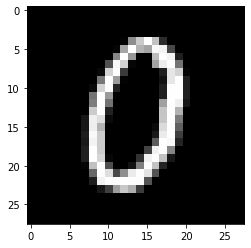

In [34]:
img = train_data.iloc[5, 1:].values.reshape(28, 28)
plt.imshow(img, cmap='gray')
plt.show()

In [6]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=[784]),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)                    
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.0001),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [7]:
x = train_data.iloc[:, 1:]
y = np.array([[0 if i!=j else 1 for j in range(10)] for i in train_data.iloc[:, 0]])

In [8]:
history = model.fit(x, y, validation_split=0.2 , epochs=10)

Epoch 1/10
1050/1050 [==============================] - 4s 3ms/step - loss: 13.1959 - accuracy: 0.7497 - val_loss: 4.2791 - val_accuracy: 0.8710
Epoch 2/10
1050/1050 [==============================] - 3s 2ms/step - loss: 3.3655 - accuracy: 0.8887 - val_loss: 2.9213 - val_accuracy: 0.9027
Epoch 3/10
1050/1050 [==============================] - 3s 2ms/step - loss: 2.1133 - accuracy: 0.9164 - val_loss: 2.2966 - val_accuracy: 0.9142
Epoch 4/10
1050/1050 [==============================] - 5s 5ms/step - loss: 1.4309 - accuracy: 0.9329 - val_loss: 1.9160 - val_accuracy: 0.9218
Epoch 5/10
1050/1050 [==============================] - 6s 5ms/step - loss: 1.0159 - accuracy: 0.9451 - val_loss: 1.6918 - val_accuracy: 0.9274
Epoch 6/10
1050/1050 [==============================] - 6s 5ms/step - loss: 0.7308 - accuracy: 0.9546 - val_loss: 1.4920 - val_accuracy: 0.9348
Epoch 7/10
1050/1050 [==============================] - 5s 4ms/step - loss: 0.5405 - accuracy: 0.9616 - val_loss: 1.4745 - val_accuracy

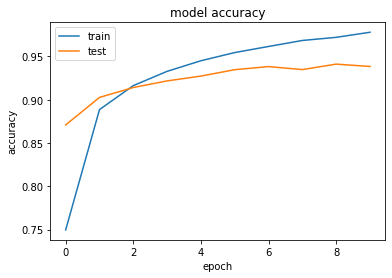

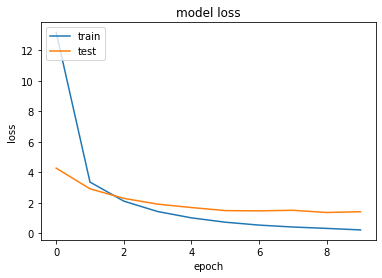

In [9]:
# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [47]:
predictions = []
for i in range(test_data.shape[0]):
  predictions.append(np.argmax(model.predict(test_data.iloc[i:i+1,].values)))
  print('\r' + str(i+1) + '/' + str(test_data.shape[0]), end='')
d = {'ImageId': [i+1 for i in range(test_data.shape[0])], 'Label': predictions}
df_output = pd.DataFrame(data=d)

28000/28000

In [48]:
df_output.to_csv(root_path + 'submission.csv', index=False)